In [ ]:
#Import Liberaries

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [407]:
train_data = pd.read_csv("train_data.txt",sep = ":::",names=['ID','TITLE','GENRE','DESCRIPTION'])
train_data.head()

/var/folders/9p/8bd7krp5039fhrwssnzc_k780000gn/T/ipykernel_30164/3017973699.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep = ":::",names=['ID','TITLE','GENRE','DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [408]:
test_data_solution = pd.read_csv("test_data_solution.txt",sep = ":::",names=['ID','TITLE','GENRE','DESCRIPTION'])
test_data_solution.head()

/var/folders/9p/8bd7krp5039fhrwssnzc_k780000gn/T/ipykernel_30164/2350961085.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution = pd.read_csv("test_data_solution.txt",sep = ":::",names=['ID','TITLE','GENRE','DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [409]:
test_data = pd.read_csv("test_data.txt",sep = ":::",names=['ID','TITLE','DESCRIPTION'])
test_data.head()

/var/folders/9p/8bd7krp5039fhrwssnzc_k780000gn/T/ipykernel_30164/879018774.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep = ":::",names=['ID','TITLE','DESCRIPTION'])


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


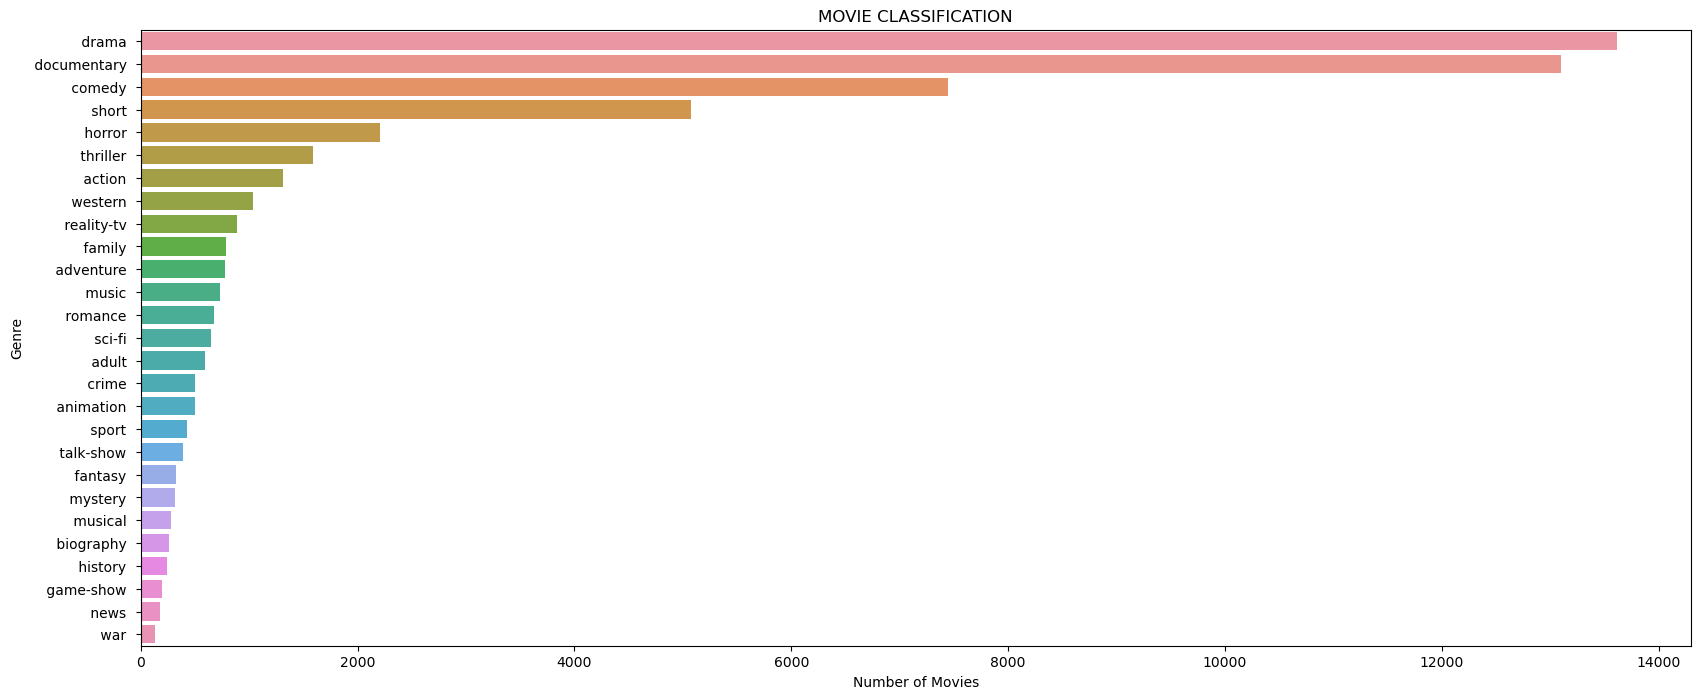

In [445]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('MOVIE CLASSIFICATION')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

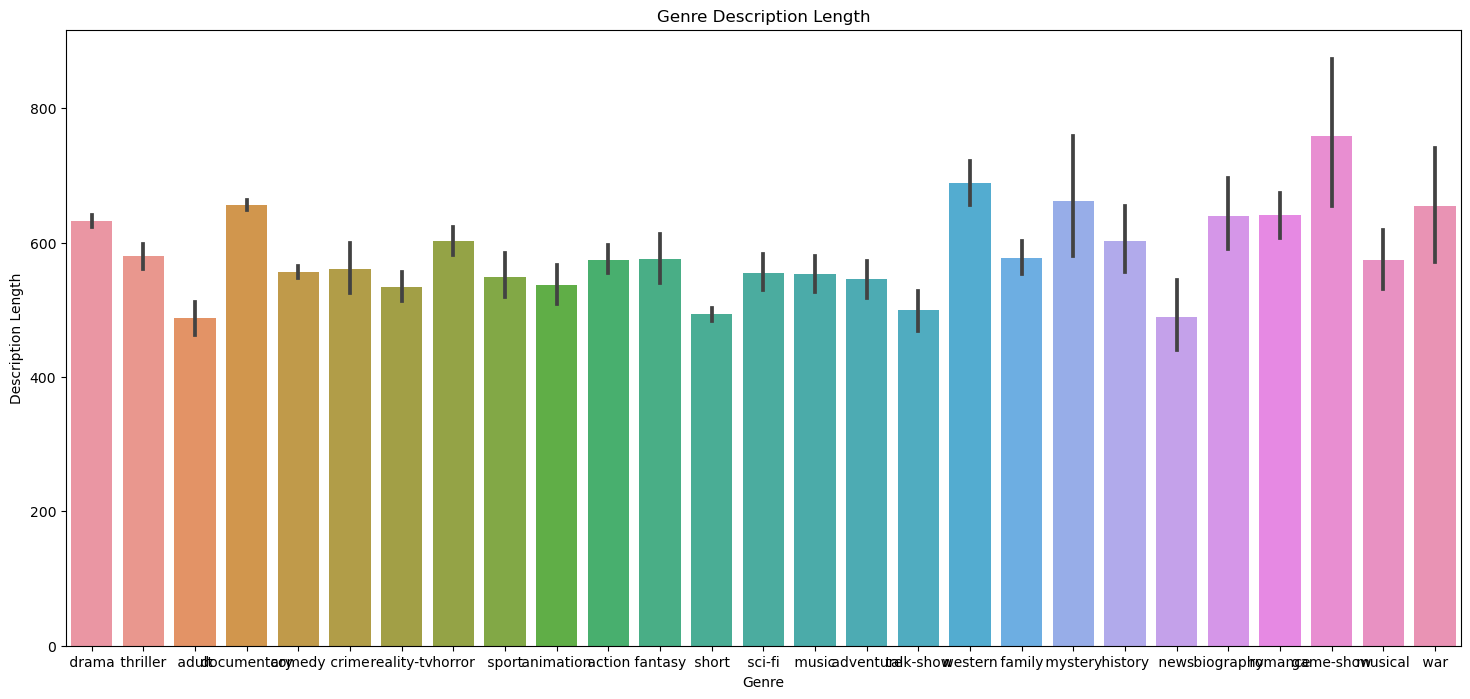

In [411]:
train_data["Description_Length"]=train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(18,8))
sns.barplot(x="GENRE",y="Description_Length", data=train_data)
plt.title('Genre Description Length')
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()


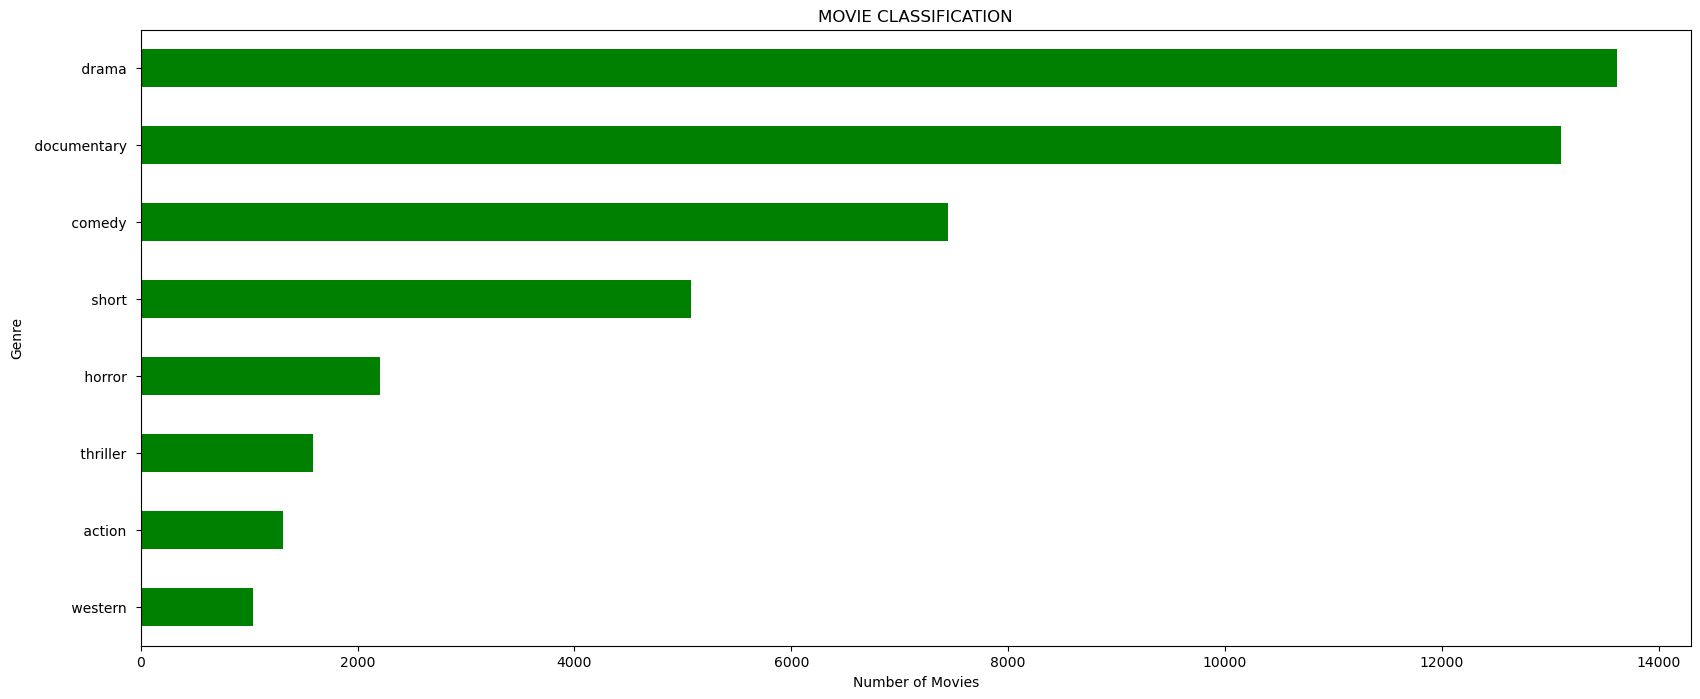

In [412]:
genre_count = train_data["GENRE"].value_counts().head(8)
genre_count_asc = genre_count.sort_values(ascending=True)
plt.figure(figsize=(20,8))
genre_count_asc.plot(kind="barh",color='green')
plt.title('MOVIE CLASSIFICATION')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [413]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

train_data['Description_Preprocessed']=train_data["DESCRIPTION"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prakashkannan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prakashkannan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prakashkannan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [414]:
train_data.head(10)

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,Description_Preprocessed
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parent oscar lea...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers body ground zero also state ...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1609,quality control consists series 16mm single ta...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,345,tough economic time max joey run idea discover...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,332,ron petrie keanu reef troubled teen whose life...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",456,sudden calamitous event causing great loss lif...
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...,426,four high school student embark terrifying jou...


In [415]:
text_data = train_data['Description_Preprocessed']
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

In [416]:
print(tfidf_features)

  (0, 12049)	0.1293098136799287
  (0, 72549)	0.18697281039355776
  (0, 94538)	0.14656043542592773
  (0, 17917)	0.1109200245497872
  (0, 8222)	0.19581515342363146
  (0, 29732)	0.20200496009350288
  (0, 21497)	0.1967358761979834
  (0, 75092)	0.13305616511806775
  (0, 36332)	0.06881849803900206
  (0, 20061)	0.10358956117137448
  (0, 36659)	0.10833332822036652
  (0, 57440)	0.0682182842375627
  (0, 56290)	0.050062569335069
  (0, 3883)	0.13924891030346856
  (0, 17414)	0.14635815087795745
  (0, 106362)	0.15116563664374807
  (0, 45828)	0.1383840921878808
  (0, 106848)	0.1760693273269924
  (0, 76447)	0.11588503652480718
  (0, 32522)	0.09208322793779954
  (0, 33278)	0.1888799664208931
  (0, 101987)	0.12118021015824282
  (0, 5738)	0.1256111934515223
  (0, 18314)	0.13277873756231665
  (0, 91909)	0.1835832590364172
  :	:
  (54213, 79623)	0.18966237304861322
  (54213, 612)	0.20107382317802855
  (54213, 88205)	0.19818284945777354
  (54213, 25139)	0.17959990651130353
  (54213, 35150)	0.189255124066785

In [429]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])

X_train,X_test,y_train,y_test=train_test_split(train_data['Description_Preprocessed'],
                                               y_train,
                                               test_size=0.2,
                                               random_state=42)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [430]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf,y_train)

MultinomialNB()

In [431]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
pred = nb_classifier.predict(X_test_tfidf)

In [432]:
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred,average='weighted')
recall = recall_score(y_test,pred,average='weighted')
f1 = f1_score(y_test,pred,average='weighted')

/Users/prakashkannan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [433]:
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)
print("f1 :",f1)

accuracy : 0.44369639398690397
precision : 0.31306016064324077
recall : 0.44369639398690397
f1 : 0.30615080860860944


In [434]:

print("Validation Accuracy:", accuracy_score(y_test, pred))

print("Validation Classification Report:\n", classification_report(y_test, pred))



Validation Accuracy: 0.44369639398690397
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.67      0.05      0.09      1443
           6       0.00      0.00      0.00       107
           7       0.53      0.89      0.66      2659
           8       0.38      0.88      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
     

/Users/prakashkannan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prakashkannan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prakashkannan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [442]:
def predict_genre(description):
    description_preprocessed = preprocess_text(description)
    tfidf_vectorizer1 = tfidf_vectorizer.transform([description_preprocessed])
    predicted_genre = nb_classifier.predict(tfidf_vectorizer1)
    return label_encoder.inverse_transform(predicted_genre)[0]
description ="A movie where police cashes the criminal and shoot him"
predicted_genre = predict_genre(description)
print("Predicted Genre:", predicted_genre)

Predicted Genre:  drama 
